# **GRADED ASSIGNMENT 3 - Task 2**

This is a programming task dedicated to SVD.

First, make your own copy of the notebook (*File $\rightarrow$ Save a copy in Drive*) or download the notebook to your machine if you prefer to work locally (*File $\rightarrow$ Download*).

Then, implement your solutions to the tasks formulated in the notebook. You can add **code cells** to write some code and **text cells** in case you want to include additional explanations to your answers in plain English.

Finally, attach the link to thi snotebook the submission form. **Make sure that all the cells are executed and all relevant outputs are being printed out**.


## Image compression with SVD

We have seen that SVD allows one to decompose any $m \times n$ matrix $A$, into the product of the orthogonal matrices $U$ and $V$ and a "diagonal" matrix $\Sigma$:

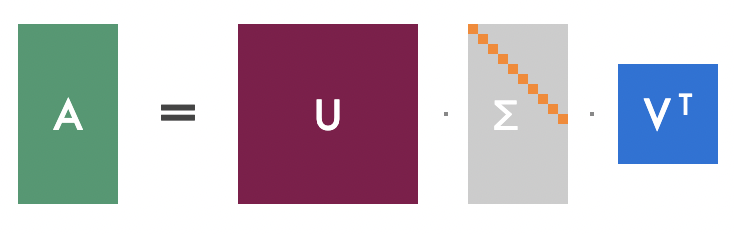

We have also discussed that we can *approximate* the original matrix $A$ by using only some parts of the matrices $U, V$ and $\Sigma$:

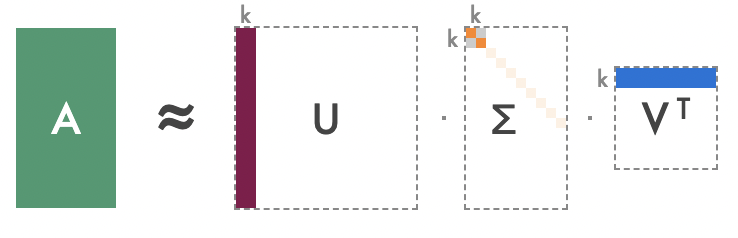

You can notice that this approximation can help us save quite a lot of space. Indeed, inspeat of storing $m \times n$ of the original values in A we now need to store only $m \times k + k + k \times n = k \times (m + n + 1)$ values. **Since images can be represented as matrices of pixel values, we can use this idea and compress images with SVD!**

Here are some videos that explain this idea and give some examples that you might want to watch before attempting the task:
- [SVD and Image Compression](https://youtu.be/DG7YTlGnCEo)
- [SVD: Image Compression in Python](https://youtu.be/H7qMMudo3e8)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, let's load the image into a $\texttt{numpy}$ array and display it.

You can use *any* image of your choice, or upload one of the sample images provided [in our repo](https://github.com/girafe-ai/math-basics-for-ai/tree/master/graded%20assignments/img).

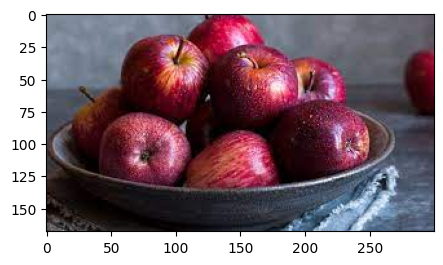

In [30]:
path = '/content/drive/MyDrive/Computer vision Images/2.jpg'

img_rgb = plt.imread(path)

plt.figure(figsize=(5, 10))
plt.imshow(img_rgb)

(168, 300, 3)


array([[[129, 141, 155],
        [129, 141, 155],
        [129, 141, 155],
        ...,
        [ 95,  89, 101],
        [ 95,  89, 101],
        [ 95,  89, 101]],

       [[129, 141, 155],
        [129, 141, 155],
        [129, 141, 155],
        ...,
        [ 95,  89, 101],
        [ 95,  89, 101],
        [ 95,  89, 101]],

       [[129, 141, 155],
        [129, 141, 155],
        [128, 140, 154],
        ...,
        [ 95,  89, 101],
        [ 95,  89, 101],
        [ 95,  89, 101]],

       ...,

       [[ 34,  25,  28],
        [ 90,  81,  84],
        [ 99,  93,  95],
        ...,
        [102, 116, 142],
        [103, 118, 141],
        [103, 118, 141]],

       [[ 96,  87,  90],
        [103,  94,  97],
        [ 97,  91,  93],
        ...,
        [ 92, 106, 132],
        [ 93, 108, 131],
        [ 93, 108, 131]],

       [[ 56,  47,  50],
        [ 67,  58,  61],
        [ 86,  80,  82],
        ...,
        [ 74,  88, 114],
        [ 74,  89, 112],
        [ 74,  89, 112]]], dtype=uint8)
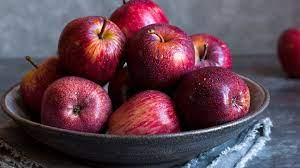

In [31]:
print(img_rgb.shape)
img_rgb

For simplicity, let's make our image black-and-white (this way, we'll only need to work with a single channel). We'll do this by averaging the signals from the red, green and blue channels for each pixel.

In [32]:
img_grayscale = np.mean(img_rgb, axis=-1)

Now, our image is represented as an $m \times n$ matrix:

In [33]:
print(img_grayscale.shape)
img_grayscale

(168, 300)


array([[141.66666667, 141.66666667, 141.66666667, ...,  95.        ,
         95.        ,  95.        ],
       [141.66666667, 141.66666667, 141.66666667, ...,  95.        ,
         95.        ,  95.        ],
       [141.66666667, 141.66666667, 140.66666667, ...,  95.        ,
         95.        ,  95.        ],
       ...,
       [ 29.        ,  85.        ,  95.66666667, ..., 120.        ,
        120.66666667, 120.66666667],
       [ 91.        ,  98.        ,  93.66666667, ..., 110.        ,
        110.66666667, 110.66666667],
       [ 51.        ,  62.        ,  82.66666667, ...,  92.        ,
         91.66666667,  91.66666667]])

We can plot the grayscale image:

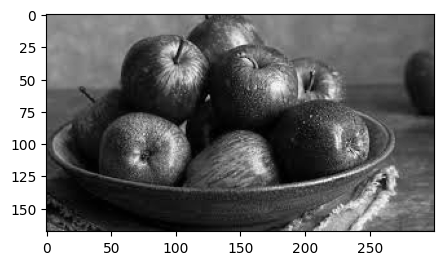

In [34]:
plt.figure(figsize=(5, 10))
plt.imshow(img_grayscale, cmap='gray')

Apply SVD on the image matrix $M$, decomposing it into the product of the orthogonal matrices $U$ and $V$ and a "diagonal" matrix $\Sigma$:

$$M_{m \times n} = U_{m \times m} \Sigma_{m \times n} V_{n \times n}^T$$

*You can use [$\texttt{np.linalg.svd()}$](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) to perform SVD.*

In [66]:
# U, sigma, Vt = np.linalg.svd(img_grayscale, full_matrices=False)
U, sigma, Vt = np.linalg.svd(img_grayscale)
sigma_diag = np.zeros((U.shape[0], Vt.shape[0]))
np.fill_diagonal(sigma_diag, sigma)

In [67]:
(U.shape),(sigma_diag.shape),(Vt.shape)          #Dimensions are correct for m and n for Matrix Multiplication validity

((168, 168), (168, 300), (300, 300))

**(1 point)** Demonstrate how you can get your image matrix back as a product of $U$, $V$ and $\Sigma$ *(express image matrix $M$ as a product of the three matrices and plot the resulting image, making sure it's the same as before)*.

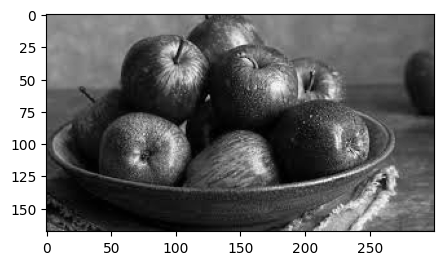

In [68]:
sigma_diag = np.diag(sigma)

# Reconstructing the image matrix grayscale
img_reconstructed = U[:, :168] @ sigma_diag @ Vt[:168, :]

# Displaying the reconstructed image
plt.figure(figsize=(5,10))
plt.imshow(img_reconstructed, cmap='gray')
plt.show()

Now, let's compress the original image! Remember that with SVD, you can approximate the original  matrix by considering only $p$ of the hidden features:

$$M_{m \times n} \approx U_{m \times p} \Sigma_{p \times p} V_{n \times p}^T$$

**(2 points)** Try reconstructing the image by using only $5, 10, ..., 100$ hidden features. Plot what happens.

*Hint: use [$\texttt{plt.subplot()}$](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) to place several images on the same plot.*

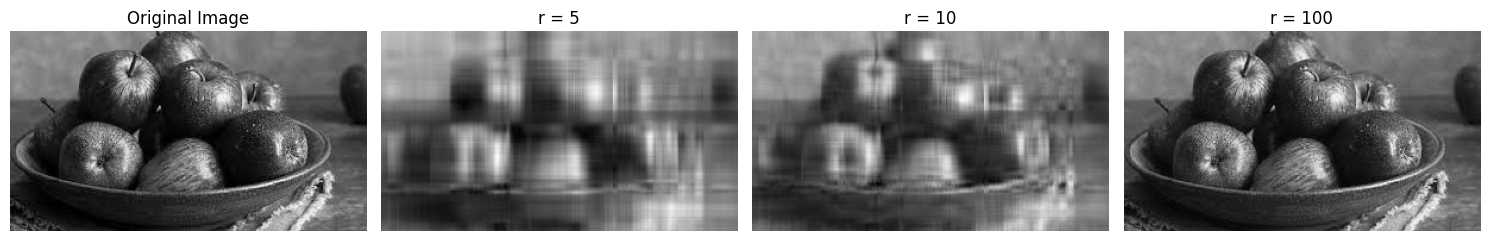

In [74]:
# TODO your code here
def reconstruct_image(r):
  U_r = U[:, :r]
  Sigma_r = np.diag(sigma[:r])
  Vt_r = Vt[:r, :]
  return U_r @ Sigma_r @ Vt_r      # reconstrucntion happening here by the SVD
ranks = [5, 10, 100]
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img_grayscale, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Ploted reconstructed images
for i, r in enumerate(ranks):
    reconstructed = reconstruct_image(r)
    axes[i + 1].imshow(reconstructed, cmap='gray')
    axes[i + 1].set_title(f'r = {r}')
    axes[i + 1].axis('off')
plt.tight_layout()
plt.show()